In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
data = pd.read_csv('srednjeni_podaci.csv', parse_dates=True)
data.head

<bound method NDFrame.head of      Unnamed: 0  godina       jan       feb        mar        apr        maj  \
0             0  1887.0  0.295349  2.032558   6.925581  12.193798  17.117054   
1             1  1888.0 -6.500000 -2.300000   7.100000  10.900000  15.900000   
2             2  1889.0 -4.000000 -0.900000   3.700000  11.000000  18.200000   
3             3  1890.0  1.300000 -1.700000   6.500000  13.000000  17.600000   
4             4  1891.0 -6.400000 -4.800000   6.500000   9.400000  19.100000   
..          ...     ...       ...       ...        ...        ...        ...   
126         126  2013.0  3.200000  4.400000   6.600000  14.800000  18.900000   
127         127  2014.0  5.200000  7.600000  10.800000  13.600000  16.900000   
128         128  2015.0  3.800000  4.000000   8.100000  13.200000  18.800000   
129         129  2016.0  2.400000  9.000000   9.000000  15.400000  17.300000   
130         130  2017.0  0.295349  2.032558   6.925581  12.193798  17.117054   

         

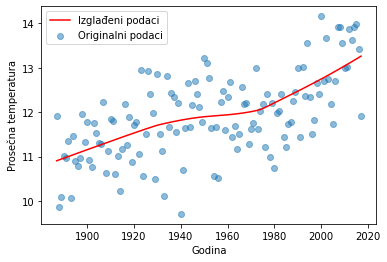

In [2]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

# Primena Loess izglađivanja na podacima
smoothed_data = lowess(data['prosek'], data['godina'])

# Prikaz izglađenih podataka
plt.plot(data['godina'], smoothed_data[:, 1], color='red', label='Izglađeni podaci')
plt.scatter(data['godina'], data['prosek'], alpha=0.5, label='Originalni podaci')
plt.xlabel('Godina')
plt.ylabel('Prosečna temperatura')
plt.legend()

plt.savefig('prosecne_temperature_lowes_bez.png')

plt.show()

In [3]:
from sklearn.metrics import mean_absolute_error

# Stvarne vrednosti
stvarne_vrednosti = data['prosek']

# Predviđene vrednosti (izglađeni podaci)
predvidjene_vrednosti = smoothed_data[:, 1]

# Izračunaj MAE
mse = mean_squared_error(stvarne_vrednosti, predvidjene_vrednosti)
mae = mean_absolute_error(stvarne_vrednosti, predvidjene_vrednosti)
print("Srednja kvadratna greška (MSE):", mse)
print("Srednja apsolutna greška (MAE):", mae)

Srednja kvadratna greška (MSE): 0.5167599031288698
Srednja apsolutna greška (MAE): 0.5792710603166312


In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterGrid
from statsmodels.nonparametric.smoothers_lowess import lowess

# Definisanje parametara 
parametri = {'frac': [0.05,0.1,0.15, 0.2,0.25, 0.3], 'it': [2, 3,4,5]}


grid = ParameterGrid(parametri)


najbolji_parametri = None
najmanja_greska = float('inf')

# Iteracija kroz sve kombinacije parametara
for params in grid:
    
    izglađeni_podaci = lowess(data['prosek'], data['godina'], frac=params['frac'], it=params['it'])
    
    greska = mean_absolute_error(data['prosek'], izglađeni_podaci[:, 1])
    
    # Ažuriranje najboljih rezultata ako je pronađena bolja kombinacija parametara
    if greska < najmanja_greska:
        najbolji_parametri = params
        najmanja_greska = greska

# Ispis rezultata
print("Najbolji parametri:", najbolji_parametri)
print("Najmanja greška (MAE):", najmanja_greska)

Najbolji parametri: {'frac': 0.05, 'it': 5}
Najmanja greška (MAE): 0.44629101419045414


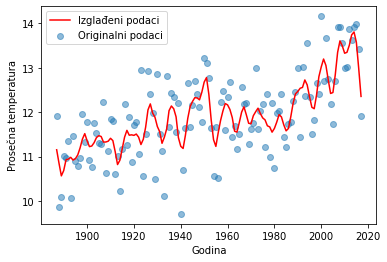

Srednja apsolutna greska: 0.5619096090895576
Srednja kvadratna greska: 0.49657103678628517


In [8]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

# Primena Loess izglađivanja sa prilagođenom širinom prozora
frac = 0.05  # Širina prozora (manja vrednost daje više nelinearnosti)
it=5
smoothed_data = lowess(data['prosek'], data['godina'], frac=frac , it=it)

# Prikaz izglađenih podataka
plt.plot(data['godina'], smoothed_data[:, 1], color='red', label='Izglađeni podaci')
plt.scatter(data['godina'], data['prosek'], alpha=0.5, label='Originalni podaci')
plt.xlabel('Godina')
plt.ylabel('Prosečna temperatura')
plt.legend()
plt.savefig('prosecne_temperature_lowess_sa.png')

plt.show()


mse = mean_squared_error(data['prosek'], izglađeni_podaci[:, 1])
mae = mean_absolute_error(data['prosek'], izglađeni_podaci[:, 1])
print(f'Srednja apsolutna greska: {mae}')
print(f'Srednja kvadratna greska: {mse}')


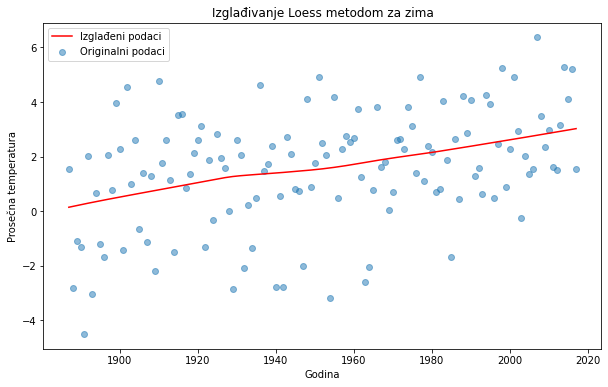

Greska za zima: 1.5790711593802151
Srednja apsolutna greska za zima: 1.5790711593802151
Srednja kvadratna greska za zima: 3.83549613449734


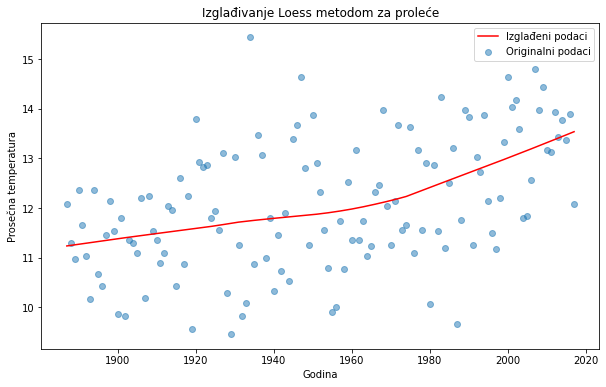

Greska za proleće: 0.9263950564221144
Srednja apsolutna greska za proleće: 0.9263950564221144
Srednja kvadratna greska za proleće: 1.306666417005179


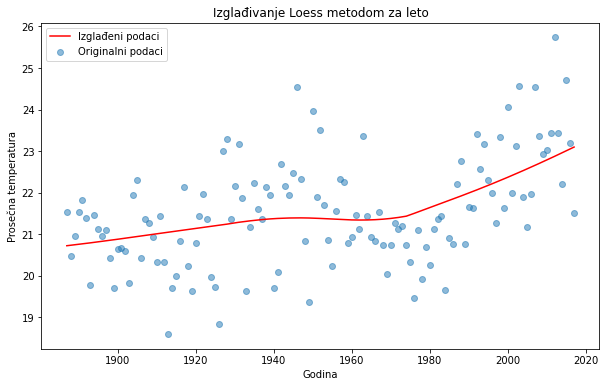

Greska za leto: 0.8656153886391215
Srednja apsolutna greska za leto: 0.8656153886391215
Srednja kvadratna greska za leto: 1.1767511846988057


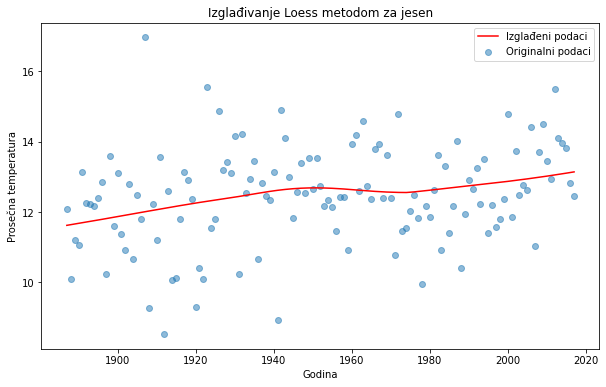

Greska za jesen: 1.0248093405630665
Srednja apsolutna greska za jesen: 1.0248093405630665
Srednja kvadratna greska za jesen: 1.7892678692181705


In [9]:
frac = 0.1  # Širina prozora

# Primena Loess izglađivanja na svaku sezonu
seasons = ['zima', 'proleće', 'leto', 'jesen']
for season in seasons:
    smoothed_data = lowess(data[season], data['godina'])
    
    # Prikaz izglađenih podataka
    plt.figure(figsize=(10, 6))
    plt.plot(data['godina'], smoothed_data[:, 1], color='red', label='Izglađeni podaci')
    plt.scatter(data['godina'], data[season], alpha=0.5, label='Originalni podaci')
    plt.xlabel('Godina')
    plt.ylabel('Prosečna temperatura')
    plt.title(f'Izglađivanje Loess metodom za {season}')
    plt.legend()
    plt.savefig(f'prosecne_{season}_lowess_bez.png')
    plt.show()
    
    mae = mean_absolute_error(data[season], smoothed_data[:, 1])
    print(f'Greska za {season}: {mae}')
    
    mse = mean_squared_error(data[season], smoothed_data[:, 1])
    mae = mean_absolute_error(data[season], smoothed_data[:, 1])
    print(f'Srednja apsolutna greska za {season}: {mae}')
    print(f'Srednja kvadratna greska za {season}: {mse}')


Najbolji parametri:
zima: (0.05, 2)
proleće: (0.05, 5)
leto: (0.05, 2)
jesen: (0.05, 3)


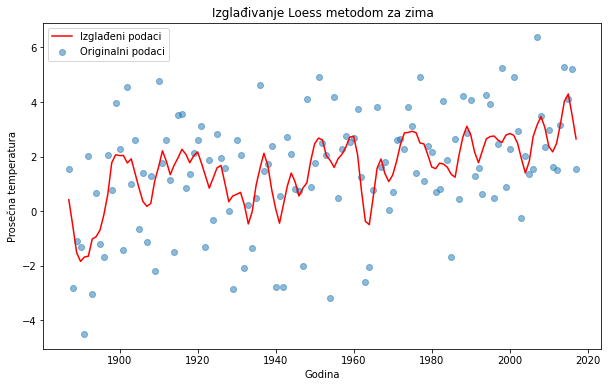

Srednja apsolutna greska za zima: 1.2945643712784023
Srednja kvadratna greska za zima: 2.6729301981400533


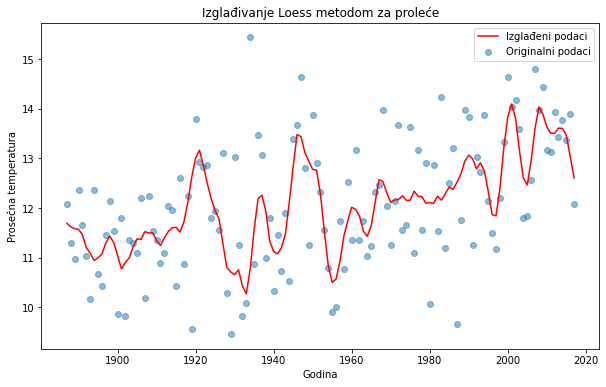

Srednja apsolutna greska za proleće: 0.7064230184021412
Srednja kvadratna greska za proleće: 0.9296652697810861


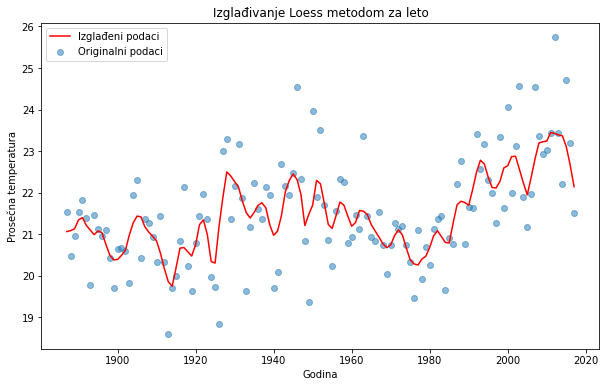

Srednja apsolutna greska za leto: 0.595049729064589
Srednja kvadratna greska za leto: 0.661838597773695


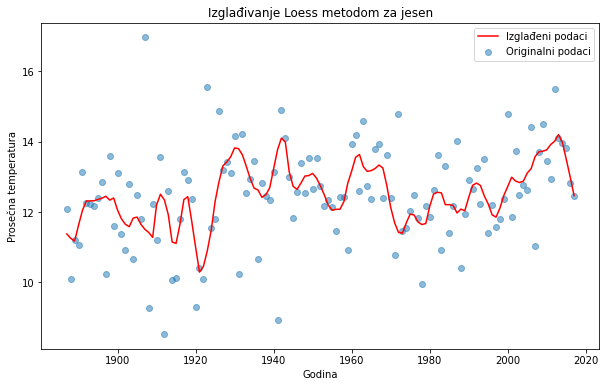

Srednja apsolutna greska za jesen: 0.8158296868352878
Srednja kvadratna greska za jesen: 1.5773480657473202


In [10]:
from sklearn.metrics import mean_absolute_error
from itertools import product

# Lista parametara
frac_values = [0.05, 0.1,0.15, 0.2,0.25,0.3]
it_values = [1, 2, 3,4,5]

# Kreiranje liste svih kombinacija parametara
param_combinations = list(product(frac_values, it_values))

# Primena Loess izglađivanja na svaku kombinaciju parametara
seasons = ['zima', 'proleće', 'leto', 'jesen']
best_params = {}
for season in seasons:
    best_mae = float('inf')
    best_param = None
    for frac, it in param_combinations:
        smoothed_data = lowess(data[season], data['godina'], frac=frac, it=it)
        mae = mean_absolute_error(data[season], smoothed_data[:, 1])
        if mae < best_mae:
            best_mae = mae
            best_param = (frac, it)
    best_params[season] = best_param

# Prikaz najboljih parametara za svaku sezonu
print("Najbolji parametri:")
for season, params in best_params.items():
    print(f"{season}: {params}")

# Ponovna primena Loess izglađivanja sa najboljim parametrima
for season, params in best_params.items():
    frac, it = params
    smoothed_data = lowess(data[season], data['godina'], frac=frac, it=it)
    
    # Prikaz izglađenih podataka
    plt.figure(figsize=(10, 6))
    plt.plot(data['godina'], smoothed_data[:, 1], color='red', label='Izglađeni podaci')
    plt.scatter(data['godina'], data[season], alpha=0.5, label='Originalni podaci')
    plt.xlabel('Godina')
    plt.ylabel('Prosečna temperatura')
    plt.title(f'Izglađivanje Loess metodom za {season}')
    plt.legend()
    plt.savefig(f'prosecne_{season}_lowess_sa.png')
    plt.show()
    mse = mean_squared_error(data[season], smoothed_data[:, 1])
    mae = mean_absolute_error(data[season], smoothed_data[:, 1])
    print(f'Srednja apsolutna greska za {season}: {mae}')
    print(f'Srednja kvadratna greska za {season}: {mse}')
